# Моделирование нелинейных систем. ДЗ-6 Уравнение Ван-дер-Поля. 

Выполнил: Давыдов Владислав Олегович

Преподаватель: Соловьев Виктор Роальдович

8 семестр, кафедра нанометрологии и наноматериалов

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## $$ \dfrac{d^2 x}{d t^2} + (- \lambda + x^2) \, \dfrac{dx}{dt} + \omega_0^2 x = 0 $$

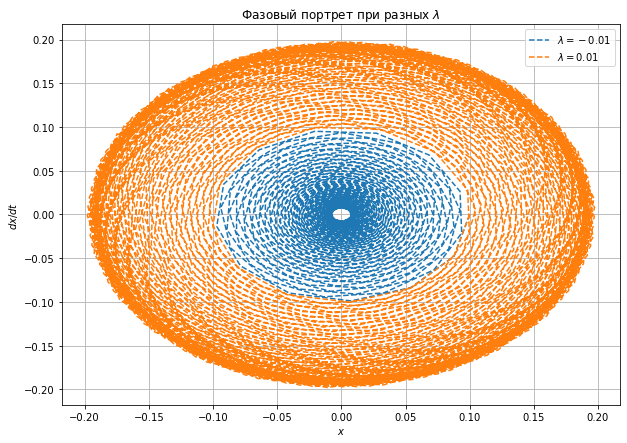

In [76]:
def system(y, t, lmbda, omega0):
    x, v = y
    dxdt = v
    dvdt = -(-lmbda + x**2) * v - omega0**2 * x
    return [dxdt, dvdt]

# Начальные условия
x0 = 0.1
v0 = 0
y0 = [x0, v0]
t = np.linspace(0, 500, 1000)

# Параметры
lmbdas = [ -0.01, 0.01]
omega0 = 1.0

plt.figure(figsize=(10, 7))
for lmbda in lmbdas:
    sol = odeint(system, y0, t, args=(lmbda, omega0))
    plt.plot(sol[:, 0], sol[:, 1], '--' ,label=f'$\\lambda={lmbda}$')

plt.xlabel('$x$')
plt.ylabel('$dx/dt$')
plt.legend()
plt.title('Фазовый портрет при разных $\\lambda$')
plt.grid(True)
plt.show()

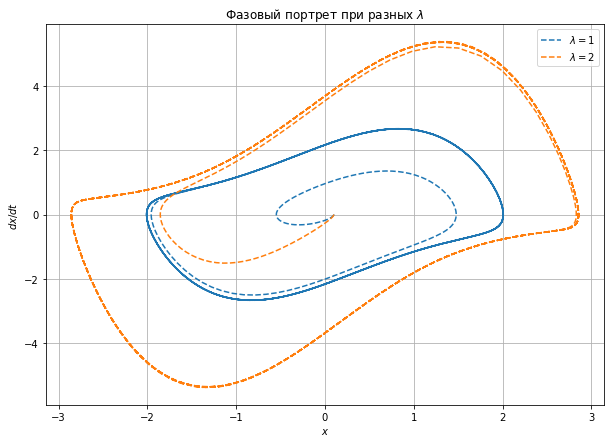

In [79]:
plt.figure(figsize=(10, 7))
t = np.linspace(0, 50, 1000)
for lmbda in [1, 2]:
    sol = odeint(system, y0, t, args=(lmbda, omega0))
    plt.plot(sol[:, 0], sol[:, 1], '--' ,label=f'$\\lambda={lmbda}$')
plt.xlabel('$x$')
plt.ylabel('$dx/dt$')
plt.legend()
plt.title('Фазовый портрет при разных $\\lambda$')
plt.grid(True)
plt.show()

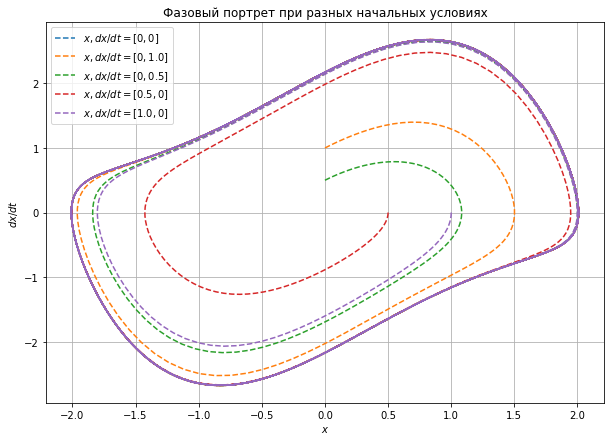

In [68]:
y0 = [[0, 0], [0, 1.0], [0, 0.5], [0.5, 0], [1.0, 0]]
t = np.linspace(0, 50, 1000)
lmbdas = [1]
omega0 = 1.0

plt.figure(figsize=(10, 7))
for j0 in y0:
    sol = odeint(system, j0, t, args=(lmbdas[0], omega0))
    plt.plot(sol[:, 0], sol[:, 1], '--' ,label=f'$ x, dx/dt ={j0}$')
    
plt.xlabel('$x$')
plt.ylabel('$dx/dt$')
plt.legend()
plt.title('Фазовый портрет при разных начальных условиях')
plt.grid(True)
plt.show()

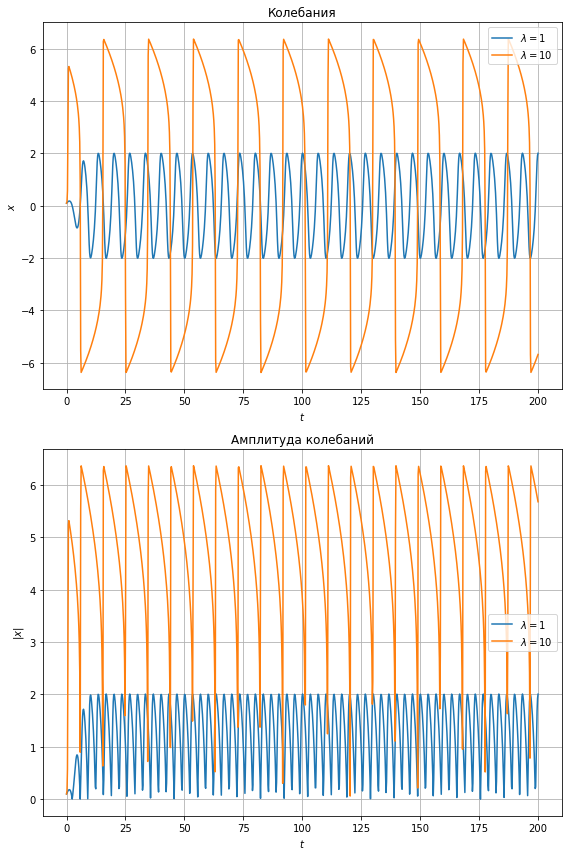

In [72]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Начальные условия
x0 = 0.1
v0 = 0.1
y0 = [x0, v0]
t = np.linspace(0, 200, 1000)

# Параметры
lmbdas = [ 1, 10]
omega0 = 1.0

fig, axs = plt.subplots(2, figsize=(8, 12))

for lmbda in lmbdas:
    sol = odeint(system, y0, t, args=(lmbda, omega0))
    axs[0].plot(t, sol[:, 0], label=f'$\\lambda={lmbda}$')
    axs[1].plot(t, np.abs(sol[:, 0]), label=f'$\\lambda={lmbda}$')

axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x$')
axs[0].set_title('Колебания')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$|x|$')
axs[1].set_title('Амплитуда колебаний')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()